# Mapa da educação 2013

In [7]:
import pandas as pd
%matplotlib inline
import folium

In [10]:
df = pd.read_csv('taxa2013.csv', encoding='latin1', skiprows=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 5 columns):
Município                                  495 non-null object
ibge                                       495 non-null int64
latitude                                   495 non-null float64
longitude                                  495 non-null float64
/Educação/Ens...de Série/Total 2013 (-)    495 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 19.4+ KB


In [11]:
df.head()

,Município,ibge,latitude,longitude,/Educação/Ens...de Série/Total 2013 (-)
0,Aceguá,4300034,-31.86076,-54.16706,"25,7"
1,Água Santa,4300059,-28.16720,-52.03100,"14,7"
2,Agudo,4300109,-29.64470,-53.25150,"26,4"
3,Ajuricaba,4300208,-28.23420,-53.77570,"24,1"
4,Alecrim,4300307,-27.65790,-54.76490,"18,9"


In [13]:
df.rename(columns={'/Educação/Ens...de Série/Total 2013 (-)':'tx_distorcao'}, inplace=True)
df.head()

,Município,ibge,latitude,longitude,tx_distorcao
0,Aceguá,4300034,-31.86076,-54.16706,"25,7"
1,Água Santa,4300059,-28.16720,-52.03100,"14,7"
2,Agudo,4300109,-29.64470,-53.25150,"26,4"
3,Ajuricaba,4300208,-28.23420,-53.77570,"24,1"
4,Alecrim,4300307,-27.65790,-54.76490,"18,9"


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 5 columns):
Município       495 non-null object
ibge            495 non-null int64
latitude        495 non-null float64
longitude       495 non-null float64
tx_distorcao    495 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 19.4+ KB


In [16]:
df['tx_distorcao'] = df['tx_distorcao'].str.replace(',', '.')

In [18]:
df.head()

,Município,ibge,latitude,longitude,tx_distorcao
0,Aceguá,4300034,-31.86076,-54.16706,25.7
1,Água Santa,4300059,-28.16720,-52.03100,14.7
2,Agudo,4300109,-29.64470,-53.25150,26.4
3,Ajuricaba,4300208,-28.23420,-53.77570,24.1
4,Alecrim,4300307,-27.65790,-54.76490,18.9


In [19]:
df['tx_distorcao'] = df['tx_distorcao'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 5 columns):
Município       495 non-null object
ibge            495 non-null int64
latitude        495 non-null float64
longitude       495 non-null float64
tx_distorcao    495 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.4+ KB


In [20]:
df.nsmallest(10, 'tx_distorcao')

,Município,ibge,latitude,longitude,tx_distorcao
490,Vista Alegre do Prata,4323606,-28.8052,-51.7946,2.6
375,Santo Antônio do Palma,4317558,-28.4956,-52.0267,4.3
28,Áurea,4301552,-27.6936,-52.0505,5.8
268,Nicolau Vergueiro,4312674,-28.5298,-52.4676,7.0
128,Derrubadas,4306320,-27.2642,-53.8645,7.4
119,Cotiporã,4305959,-28.9891,-51.6971,7.5
68,Campestre da Serra,4303673,-28.7926,-51.0941,7.6
476,Vanini,4322558,-28.4758,-51.8447,7.8
236,Linha Nova,4311643,-29.4679,-51.2003,8.0
392,São José do Inhacorá,4318499,-27.7251,-54.1275,8.0


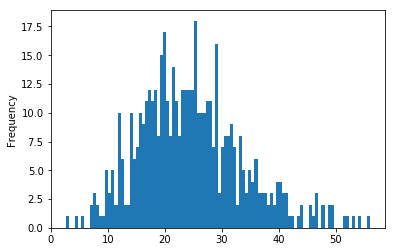

In [21]:
df['tx_distorcao'].plot.hist(bins=100)

In [23]:
df[df['tx_distorcao'] <= 10].count()

Município       17
ibge            17
latitude        17
longitude       17
tx_distorcao    17
dtype: int64

In [25]:
brasil = folium.Map(
    location=[-13.6603615, -69.6775883],
    zoom_start=4
)

In [26]:
brasil

In [27]:
rgrande = folium.Map(
    location=[-30.3387976,-58.1646752],
    zoom_start=4
) 

rgrande

In [35]:
for indice, municipio in df[df['tx_distorcao']<=10].iterrows():
    folium.Marker(
        location=[ municipio['latitude'], municipio['longitude']],
        popup=municipio['Município'],
        icon=folium.map.Icon(color='green')
    ).add_to(rgrande)

In [36]:
rgrande

In [38]:
for indice, municipio in df[df['tx_distorcao']>=45].iterrows():
    folium.Marker(
        location=[ municipio['latitude'], municipio['longitude']],
        popup=municipio['Município'],
        icon=folium.map.Icon(color='red')
    ).add_to(rgrande)
rgrande    

In [39]:
df[df['Município'] == 'Porto Alegre']['tx_distorcao']

325    32.3
Name: tx_distorcao, dtype: float64